# HW05: Classification and Deep Learning Essentials (due 31st October)

**As part of NEXT WEEK'S homework you will have to provide feedback to two of your classmates' essays on Moodle (by Friday Nov 3rd, at 23:59).** On Moodle, you will be automatically assigned to the two essays you have to provide feedback to on Monday Oct 30th at midnight, in case you want to start ahead.

In this homework, we focus again on a prediction task (as we did in week 3). Before diving into the coding part of the homework, I would like you to reflect on the following problem and how you would approach it.

*Suppose you are a policy advisor to a developing country government that would like to design a social security program to aid individuals with wages lower than \$1000 per month. However, data collection in this country is very hard due to the lack of technology infrastructures, incentives to misreport income, and geographical barriers. Therefore, you have access to some demographic and employment data at the individual level from all the municipalities in addition to geographical and municipality level features (here, you can be creative about which variables you have access to). However, you have access to income data only for a random set of municipalities.*

*How would you decide how to allocate the transfer using the methods you learned for this course? Be very specific on the method and the main variables you would use.*

**There is no right or wrong answer here. This is just a conceptual exercise to make you think about the methods we are learning about in real-life problems.** You don't need to write a lot about this; 100 words or even a scheme about your solution to this task would be enough.

## Coding Exercise

Another area of research that is increasingly employing machine learning is that of medical research (a great example of it is [Mullainathan and Obermeyer, 2021](https://www.nber.org/papers/w26168)). The correct prediction of who may encounter a critical clinical condition is fundamental for the allocation of treatments. Indeed, both treatment availability and doctors' time are not infinite. Therefore, correctly predicting who may be more likely to experience a heart attack or develop cancer is extremely important to help these people and not waste precious resources at the same time.

In the following, the main goal will be to predict the probability of a heart attack using some health indicators described below. **Note that these are fake data created following the pattern from a dataset with real health indicators.**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/HW05.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Attribute Information**

- age
- sex: 0 = female; 1 = male
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### XGboost

In this part you will build a classifier for the likelihood of having an heart attack using xgboost. You have to train, validate your classifier and print the most meaningful metrics.

In [6]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 7.6 MB/s eta 0:00:00


In [7]:
import xgboost as xgb
from xgboost import XGBClassifier

# all columns up to the last one:
X = df.iloc[:, :-1]
# only the last column:
y = df.iloc[:, -1]

##TODO split the sample into a training, a test set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

##TODO train a classifier using early stopping and the logloss evaluation metric 
xgb_class = XGBClassifier()
eval_set = [(X_val, y_val)]
xgb_class.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.26531
[1]	validation_0-error:0.24490
[2]	validation_0-error:0.22449
[3]	validation_0-error:0.26531
[4]	validation_0-error:0.22449
[5]	validation_0-error:0.24490
[6]	validation_0-error:0.20408
[7]	validation_0-error:0.22449
[8]	validation_0-error:0.22449
[9]	validation_0-error:0.22449
[10]	validation_0-error:0.20408
[11]	validation_0-error:0.26531
[12]	validation_0-error:0.18367
[13]	validation_0-error:0.26531
[14]	validation_0-error:0.22449
[15]	validation_0-error:0.22449
[16]	validation_0-error:0.22449
[17]	validation_0-error:0.22449
[18]	validation_0-error:0.24490
[19]	validation_0-error:0.22449
[20]	validation_0-error:0.22449
[21]	validation_0-error:0.20408
[22]	validation_0-error:0.22449
[23]	validation_0-error:0.22449
[24]	validation_0-error:0.22449
[25]	validation_0-error:0.18367
[26]	validation_0-error:0.18367
[27]	validation_0-error:0.18367
[28]	validation_0-error:0.20408
[29]	validation_0-error:0.18367
[30]	validation_0-error:0.18367
[31]	validation_0-

c:\Users\rohit\miniconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-error:0.20408
[42]	validation_0-error:0.22449
[43]	validation_0-error:0.22449
[44]	validation_0-error:0.22449
[45]	validation_0-error:0.22449
[46]	validation_0-error:0.22449
[47]	validation_0-error:0.22449
[48]	validation_0-error:0.22449
[49]	validation_0-error:0.20408
[50]	validation_0-error:0.20408
[51]	validation_0-error:0.20408
[52]	validation_0-error:0.20408
[53]	validation_0-error:0.20408
[54]	validation_0-error:0.20408
[55]	validation_0-error:0.20408
[56]	validation_0-error:0.20408
[57]	validation_0-error:0.18367
[58]	validation_0-error:0.18367
[59]	validation_0-error:0.18367
[60]	validation_0-error:0.18367
[61]	validation_0-error:0.18367
[62]	validation_0-error:0.18367
[63]	validation_0-error:0.18367
[64]	validation_0-error:0.18367
[65]	validation_0-error:0.18367
[66]	validation_0-error:0.18367
[67]	validation_0-error:0.18367
[68]	validation_0-error:0.18367
[69]	validation_0-error:0.18367
[70]	validation_0-error:0.18367
[71]	validation_0-error:0.18367
[72]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [10]:
!pip install --upgrade scikit-learn

     ---------------------------------------- 9.3/9.3 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0


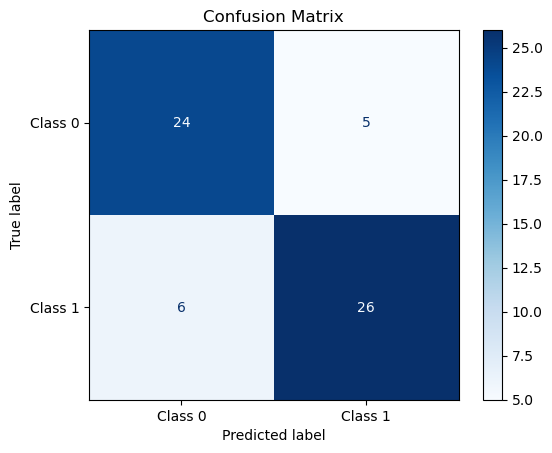

Accuracy             0.820


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# TODO: Train your XGBoost model and make predictions
y_pred = xgb_class.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion, display_labels=["Class 0", "Class 1"])

# Plot the confusion matrix
disp.plot(cmap=plt.get_cmap('Blues'), values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("{:20s} {:.3f}".format("Accuracy", accuracy))


**What can you say about the performance of your classifier based on these metrics?**

Model seems to be have equidistributed accurary for both labels. 

**Which metrics are better suited to evaluate this model? Calculate and visualize these metrics, and comment on the performance of the model.**

Precision, recall, and F1 score are better indicators of the model.

In [24]:
from sklearn.metrics import (precision_score, recall_score, f1_score, precision_recall_curve,
                             balanced_accuracy_score, roc_curve, auc, roc_auc_score)

# Calculate other evaluation metrics for XGBoost
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, xgb_class.predict_proba(X_test)[:, 1])
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred)

# Print other XGBoost metrics
print("XGBoost Precision: {:.3f}".format(precision_xgb))
print("XGBoost Recall: {:.3f}".format(recall_xgb))
print("XGBoost F1 Score: {:.3f}".format(f1_xgb))
print("XGBoost ROC AUC: {:.3f}".format(roc_auc_xgb))
print("XGBoost Balanced Accuracy: {:.3f}".format(balanced_accuracy_xgb))

XGBoost Precision: 0.839
XGBoost Recall: 0.812
XGBoost F1 Score: 0.825
XGBoost ROC AUC: 0.906
XGBoost Balanced Accuracy: 0.820


c:\Users\rohit\miniconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  is_bool_dtype,
c:\Users\rohit\miniconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  


## Deep Learning

Now, you will build an analogous classifier, i.e., with the same objective as the one in the previous part, using a neural network structure. 

In [26]:
## build a MLP (multilayer perceptron) model to predict the outcome using 
# the same predictors as in the XGBoost model.
# the MLP model should have at least 2 hidden layers, ReLU activation
import torch.nn as nn

#TODO

nn_model = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

In [32]:
# define the loss function and the optimizer
#TODO
import torch
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.Tensor(y_train.values).view(-1, 1)

In [31]:
import torch
print(torch.__version__)

2.0.1


In [34]:
#fit the model on the training data

#TODO
# Number of epochs
n_epochs = 100

# Training the NN model
for epoch in range(n_epochs):
    optimizer.zero_grad()
    output = nn_model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()


# Convert test data to PyTorch tensor
X_test_tensor = torch.Tensor(X_test.values)

# Predict using NN model
nn_preds = nn_model(X_test_tensor).detach().numpy()

In [35]:
#compute the test set accuracy, as well as the metrics you picked to evaluate the xgboost model
# Calculate the test set accuracy
nn_accuracy = ((nn_preds >= 0.5).astype(int) == y_test.values.reshape(-1, 1)).mean()

# Calculate other evaluation metrics for NN
nn_threshold = 0.5
nn_preds_binary = (nn_preds >= nn_threshold).astype(int)
nn_precision = precision_score(y_test, nn_preds_binary)
nn_recall = recall_score(y_test, nn_preds_binary)
nn_f1 = f1_score(y_test, nn_preds_binary)
nn_roc_auc = roc_auc_score(y_test, nn_preds)
nn_balanced_accuracy = balanced_accuracy_score(y_test, nn_preds_binary)

# Print NN metrics
print("NN Accuracy: {:.3f}".format(nn_accuracy))
print("NN Precision: {:.3f}".format(nn_precision))
print("NN Recall: {:.3f}".format(nn_recall))
print("NN F1 Score: {:.3f}".format(nn_f1))
print("NN ROC AUC: {:.3f}".format(nn_roc_auc))
print("NN Balanced Accuracy: {:.3f}".format(nn_balanced_accuracy))

NN Accuracy: 0.869
NN Precision: 0.875
NN Recall: 0.875
NN F1 Score: 0.875
NN ROC AUC: 0.895
NN Balanced Accuracy: 0.869


c:\Users\rohit\miniconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  is_bool_dtype,
c:\Users\rohit\miniconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  


**How does the NN-based classifier performs with respect to the XGBOOST one?**
Deep Learning models peroforms well within the same metrics. to XG boost model.

**OPTIONAL QUESTION: Suppose that one of the classifiers you built performs very well, would you suggest using it to decide on the allocation of treatments to prevent heart attacks?**

Not necessarily. XG Boost model indicates the real parameter importance while Deep Learning models fail to provide relevant explanation about the paramters and their uses. Also, medical advise is regulated in terms of accountability. Hence, it wont be a wise choice to use deep learning model for medical advise.